# Multi-view reconstruction

## 1. Prerequisites

### 1.1 Load binarizes images

In [1]:
from alinea.phenomenal.data_access.plant_1 import plant_1_images_binarize

# Load images binarize of the plant_1
images = plant_1_images_binarize()

### 1.2 Load calibration object

In [2]:
from alinea.phenomenal.data_access.plant_1 import plant_1_calibration_camera_side

# Load calibration associate to camera of the plant_1
calibration = plant_1_calibration_camera_side()

## 2. Multi-view reconstruction

### 2.1 Associate images and projection function

In [3]:
# Select images for angle 0 to 360
images_projections = list()
for angle in range(0, 360, 30):
    # Get the binarize image for each angle
    img = images[angle]
    # Get projection function assiciate to image
    projection = calibration.get_projection(angle)
    # Append the couple image / projection to the list
    images_projections.append((img, projection))

### 2.2 Do multi-view reconstruction

In [4]:
from alinea.phenomenal.multi_view_reconstruction.multi_view_reconstruction import reconstruction_3d

voxel_size = 4
voxel_centers = reconstruction_3d(images_projections, voxel_size=voxel_size, verbose=True)

Iteration 1 / 10 :  8 -  8
Iteration 2 / 10 :  64 -  8
Iteration 3 / 10 :  64 -  14
Iteration 4 / 10 :  112 -  49
Iteration 5 / 10 :  392 -  150
Iteration 6 / 10 :  1200 -  437
Iteration 7 / 10 :  3496 -  1414
Iteration 8 / 10 :  11312 -  5401
Iteration 9 / 10 :  43208 -  22993
Iteration 10 / 10 :  183944 -  120073


### 2.3 Read & Write

In [7]:
from alinea.phenomenal.multi_view_reconstruction.formats import write_to_csv, read_from_csv

# Write
write_to_csv('plant_1.csv', voxel_centers, voxel_size)

# Read
voxel_centers, voxel_size = read_from_csv('plant_1.csv')

### 2.4 Viewing

<IPython.core.display.Javascript object>


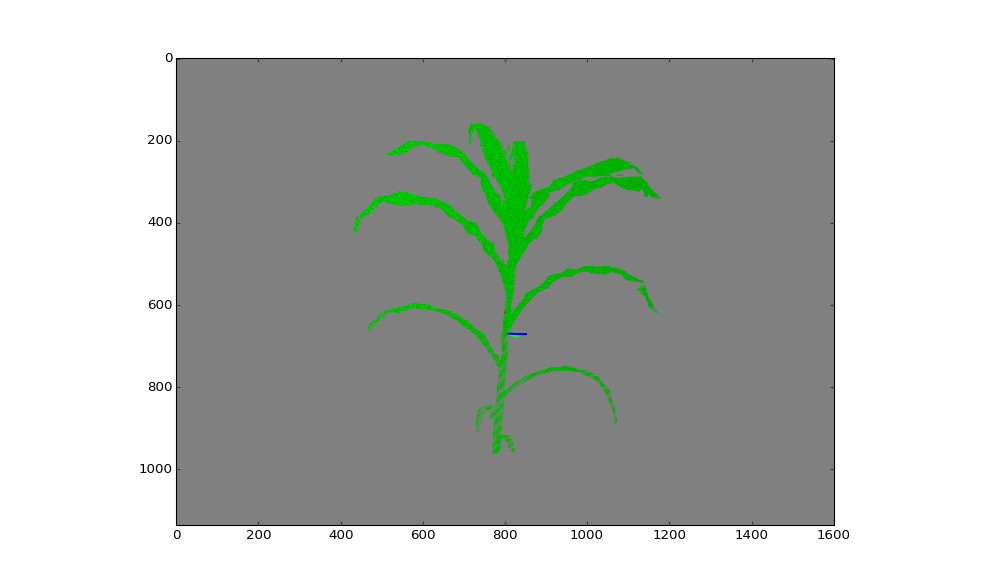

In [9]:
%matplotlib notebook

from alinea.phenomenal.display import (show_points_3d, show_image)

im = show_points_3d(voxel_centers, scale_factor=2, color=(0, 1, 0))
# Documentation image incrustation
show_image(im)